**What is Time Series?**

In mathematics, a time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.


**What is Time Series Forecasting?**

Time series forecasting is the process of analyzing time series data using statistics and modeling to make predictions and inform strategic decision-making.

**What is univariate and multivariate time series?**

The univariate time series consists of a single observation over a time period. The multivariate time series consists of more than one observations collected over time.

**What is an LSTM network?**

Long Short-Term Memory Networks is a deep learning, sequential neural network that allows information to persist. It is a special type of Recurrent Neural Network which is capable of handling the vanishing gradient problem faced by RNN. Capable of learning long-term dependencies, especially in sequence prediction problems.

**What is Deep Learning?**

Deep learning is a method in artificial intelligence (AI) that teaches computers to process data in a way that is inspired by the human brain. Deep learning models can recognize complex patterns in pictures, text, sounds, and other data to produce accurate insights and predictions.

**What is sequential neural networks?**

Sequence models are the machine learning models that input or output sequences of data. Sequential data includes text streams, audio clips, video clips, time-series data and etc. Recurrent Neural Networks (RNNs) is a popular algorithm used in sequence models.

**What is Recurrent Neural Network?**

Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other, but in cases when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words. Thus RNN came into existence, which solved this issue with the help of a Hidden Layer. The main and most important feature of RNN is its Hidden state, which remembers some information about a sequence. The state is also referred to as Memory State since it remembers the previous input to the network. It uses the same parameters for each input as it performs the same task on all the inputs or hidden layers to produce the output. This reduces the complexity of parameters, unlike other neural networks.

**Vanishing Gradient Problem is addressed in the video provided in project folder.**

**Our Objective**

Our main object in the project is to use LSTM Network to develope a Multivariate Time Series for Predicting Stock Price or Stock Price Forecasting.

**About the dataset**

Our main dataset will be from yahoo finance data of General Electronic Stocks

**Installing dependencies**

In [ ]:
!pip install keras

In [ ]:
!pip install numpy

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install seaborn

**Importing Libraries**

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
#from datetime import datetime

**Defining Variables**

In [2]:
df = pd.read_csv('/content/GE.csv')

# displaying the DataFrame
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-25,68.462135,68.992973,68.188911,68.805618,68.575447,2426342
1,2022-11-28,68.071815,68.352852,66.479317,66.721313,66.498116,5487676
2,2022-11-29,66.939888,67.072601,66.323189,66.869637,66.645943,5750409
3,2022-11-30,66.854019,67.408272,64.941452,67.111633,66.887131,9301085
4,2022-12-01,67.298988,67.611244,66.252930,66.557381,66.334732,5432337
...,...,...,...,...,...,...,...
246,2023-11-17,119.330002,120.080002,118.940002,119.930000,119.930000,4139200
247,2023-11-20,119.930000,120.739998,119.639999,120.070000,120.070000,4142600
248,2023-11-21,119.800003,120.250000,119.040001,119.889999,119.889999,2798100
249,2023-11-22,119.900002,120.489998,119.360001,119.599998,119.599998,3011800


In [3]:
#Seperate dates for future plotting

train_dates = pd.to_datetime(df['Date'])

display(train_dates)



0     2022-11-25
1     2022-11-28
2     2022-11-29
3     2022-11-30
4     2022-12-01
         ...    
246   2023-11-17
247   2023-11-20
248   2023-11-21
249   2023-11-22
250   2023-11-24
Name: Date, Length: 251, dtype: datetime64[ns]

In [4]:
cols = list(df)[1:6]#Our set of multi-variable

display(cols)

['Open', 'High', 'Low', 'Close', 'Adj Close']

In [5]:
#representing the variables in float format
df_for_training = df[cols].astype(float)
display(df_for_training)

,Open,High,Low,Close,Adj Close
0,68.462135,68.992973,68.188911,68.805618,68.575447
1,68.071815,68.352852,66.479317,66.721313,66.498116
2,66.939888,67.072601,66.323189,66.869637,66.645943
3,66.854019,67.408272,64.941452,67.111633,66.887131
4,67.298988,67.611244,66.252930,66.557381,66.334732
...,...,...,...,...,...
246,119.330002,120.080002,118.940002,119.930000,119.930000
247,119.930000,120.739998,119.639999,120.070000,120.070000
248,119.800003,120.250000,119.040001,119.889999,119.889999
249,119.900002,120.489998,119.360001,119.599998,119.599998


In [6]:
#not necessary to plot just for fun ;)


#df_for_plot = df_for_training.tail(5000)
#df_for_plot.plot.line()

**Normalization**

Scaling the data can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm. In particular, several ML techniques, such as neural networks, require that the input data to be normalized for it to work well.

So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

In [7]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude
#so values need to be normalized
#normalized data set

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [8]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timestemp
#Here n_features is 2. We will make timestemps = 3.
#With this, the resultant n_Samples is 5 (as the input data has 9 rows).


trainX = []
trainY = []

n_future = 1 #no of days we want to predict into the future
n_past = 14 #no of days we want to predict the future


for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
  trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
  trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (237, 14, 5).
trainY shape == (237, 1).


In [9]:
#define auto encoder model

model = Sequential()
model.add(LSTM(64, activation = 'relu', input_shape = (trainX.shape[1], trainX.shape[2]), return_sequences= True))
model.add(LSTM(32, activation = 'relu', return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
#model fit

history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
14/14 [==============================] - 4s 69ms/step - loss: 0.3715 - val_loss: 0.0375
Epoch 2/5
14/14 [==============================] - 0s 17ms/step - loss: 0.0739 - val_loss: 0.0481
Epoch 3/5
14/14 [==============================] - 0s 17ms/step - loss: 0.0585 - val_loss: 0.0656
Epoch 4/5
14/14 [==============================] - 0s 18ms/step - loss: 0.0421 - val_loss: 0.0714
Epoch 5/5
14/14 [==============================] - 0s 27ms/step - loss: 0.0512 - val_loss: 0.0424


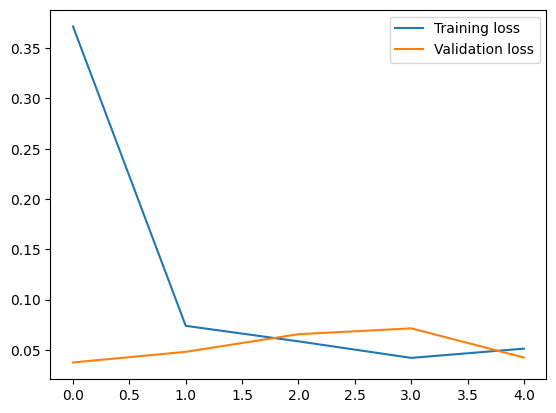

In [11]:
#historical change

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [13]:
#forecasting


#starting with the last date in the training date pridicting future....

n_future = 90
forecast_period_dates = pd.date_range(list(train_dates)[-1],periods = n_future,freq = '1d').tolist()
forecast = model.predict(trainX[-n_future:])#forecast


#perform inverse transformation to rescale back to original range
#Since we use 5 variables for transform, the inverse expects same dimensions
#thus copy values 5 times and discard them after inverse transform

forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis = -1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]


#converting timestems to dates

forecast_dates = []
for time_i in forecast_period_dates:
  forecast_dates.append(time_i.date())


df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])





3/3 [==============================] - 0s 8ms/step


In [ ]:
#original = df[['Date','Open']]
#original['Date'] = pd.to_datetime(original['Date'])
#original = original.loc[original['Date'] >= '2023-11-24']

#sns.lineplot(original['Date'], original['Open'])
#sns.lineplot(df_forecast['Date'], df_forecast['Open'])

<ipython-input-18-a2a59310cec8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] = pd.to_datetime(original['Date'])


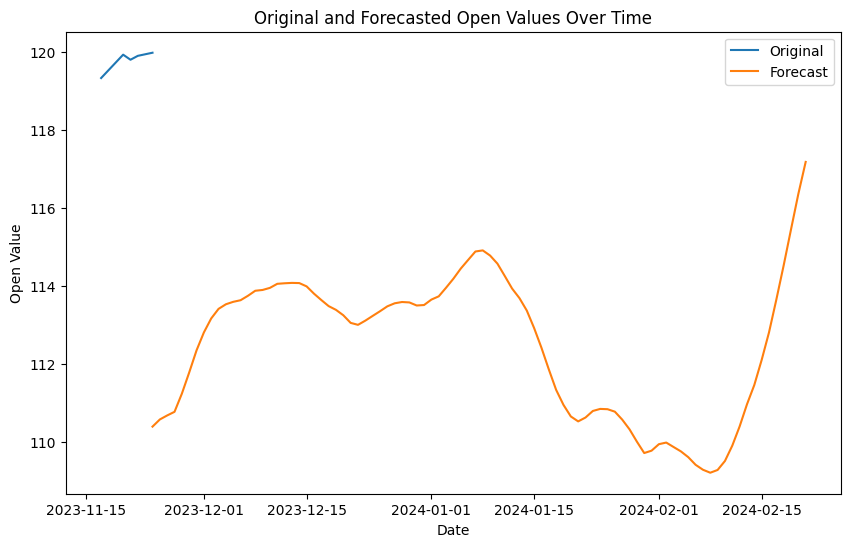

In [18]:

original = df[['Date', 'Open']]
original['Date'] = pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2023-11-17']

# Plotting using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x='Date', y='Open', data=original, label='Original')
sns.lineplot(x='Date', y='Open', data=df_forecast, label='Forecast')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Open Value')
plt.title('Original and Forecasted Open Values Over Time')

# Adding legend
plt.legend()

# Show the plot
plt.show()

In [19]:
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

[Timestamp('2023-11-02 00:00:00', freq='C'), Timestamp('2023-11-03 00:00:00', freq='C'), Timestamp('2023-11-06 00:00:00', freq='C'), Timestamp('2023-11-07 00:00:00', freq='C'), Timestamp('2023-11-08 00:00:00', freq='C'), Timestamp('2023-11-09 00:00:00', freq='C'), Timestamp('2023-11-13 00:00:00', freq='C'), Timestamp('2023-11-14 00:00:00', freq='C'), Timestamp('2023-11-15 00:00:00', freq='C'), Timestamp('2023-11-16 00:00:00', freq='C'), Timestamp('2023-11-17 00:00:00', freq='C'), Timestamp('2023-11-20 00:00:00', freq='C'), Timestamp('2023-11-21 00:00:00', freq='C'), Timestamp('2023-11-22 00:00:00', freq='C'), Timestamp('2023-11-24 00:00:00', freq='C')]
1/1 [==============================] - 0s 26ms/step


<ipython-input-21-4489e959eb24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] = pd.to_datetime(original['Date'])


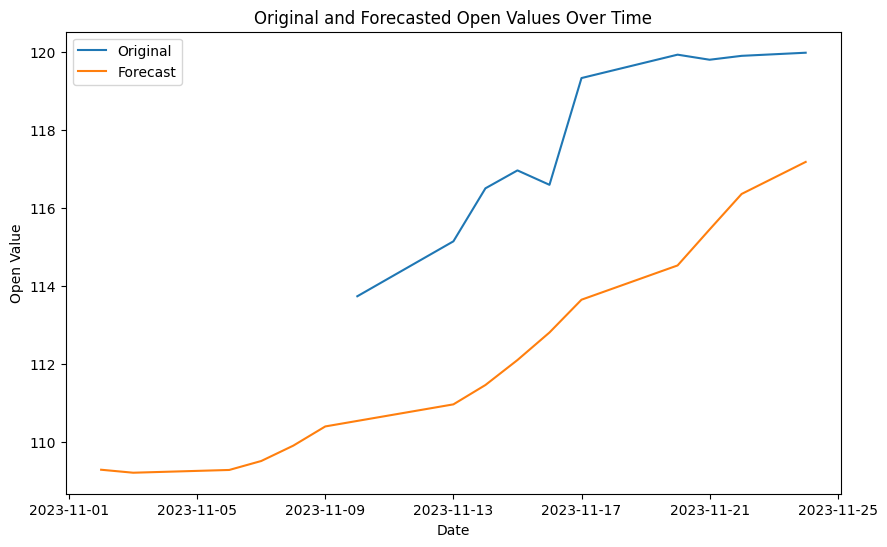

In [21]:

original = df[['Date', 'Open']]
original['Date'] = pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2023-11-10']

# Plotting using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x='Date', y='Open', data=original, label='Original')
sns.lineplot(x='Date', y='Open', data=df_forecast, label='Forecast')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Open Value')
plt.title('Original and Forecasted Open Values Over Time')

# Adding legend
plt.legend()

# Show the plot
plt.show()